<a href="https://colab.research.google.com/github/COTILab/MCX24Workshop/blob/master/Training/MCX2024_1E_pmcx_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Workshop Logo](https://mcx.space/wiki/upload/mcx24_logo.png)
# MCX Training Workshop 2024 - Day 1, Session 1.E


## Session 1.E: PMCX training

# <font color='orange'>Step 0: Setting up MCX and Octave environments within Google Colab</font>

> **You must rerun all cells in Step 0 in appearance order when you start a new session, or after reconnect to a runtime**

To run interactive Octave sessions inside a Google Colab Jupyter Notebook environment, we need to install the following dependencies
- GNU Octave via `sudo apt-get install octave`
- Oct2py Python module via `pip install oct2py`, and
- enable Oct2py in Jupyter Notebook via "magic command" `%load_ext oct2py.ipython`

<font color='green'>If you run this on Google Colab, please go to menu **Edit\Notebook Settings\Hardware accelerator**, and verify if it has already selected "GPU"; if not, please select the T4 GPU.</font>

**Please note**: MCX/MCXLAB is GPU-accelerated. This notebook by default requests an NVIDIA GPU. Howevever, when you click on the run-button for the below section, your browser may fail to allocate a GPU runtime and ask you if you want to continue with a non-GPU runtime. If you choose to proceed without GPU support, you will have to run the [section immediately following the next section](#mcx_setup_opencl) to install OpenCL-based MCXLAB (called mcxlabcl) and utilize the CPU to run the rest of the tutorials. The OpenCL version of MCXLAB will work for all examples, but will be substentially slower to run (this tutorial also reduces the photon numbers accordingly to lower the runtime).

In [ ]:
#@title <font color='orange'>Init 1: Initial setup of environment for running MCXLAB (run the below section once)</font>

# install octave and oct2py
! [[ ! -z "${COLAB_CUSTOMIZE_FOR_VM_TYPE}" ]] && apt-get update && apt-get install octave jq libpocl2 pocl-opencl-icd libnvidia-compute-535   # install octave (a free matlab clone), jq and OpenCL runtimes
! [[ ! -z "${COLAB_CUSTOMIZE_FOR_VM_TYPE}" ]] && python3 -m pip install oct2py jdata bjdata matplotlib   # install oct2py, jdata, bjdata and matplotlib Python modules

# add octave support to colab notebook
%load_ext oct2py.ipython

# download and unzip MCXStudio
! rm -rf MCXStudio*
! wget https://mcx.space/nightly/release/MCX24/MCXStudio-linux-x86_64-nightlybuild.zip  # download MCX suite
! unzip -o MCXStudio-linux-x86_64-nightlybuild.zip && rm -rf MCXStudio-linux-x86_64-nightlybuild.zip # unzip MCX suite

# add executable to the shell's paths
! cp -a "$PWD/MCXStudio/MCXSuite/mcx/bin/mcx*" "$PWD"
! cp -a "$PWD/MCXStudio/MCXSuite/mcxcl/bin/mcxcl*" "$PWD"
! cp -a "$PWD/MCXStudio/MCXSuite/mmc/bin/mmc*" "$PWD"
! cp -a "$PWD/MCXStudio/MATLAB/zmat/octave/gnu-linux-x86_64/zipmat.mex" "$PWD/MCXStudio/MATLAB/zmat/"

# if a GPU runtime can not be allocated, run this section to setup OpenCL and MCXLAB-CL
! [[ ! -f `which nvidia-smi` ]] && mv "$PWD/mcxcl" "$PWD/mcx"
! mcx -L

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,393 kB]
Get:13 http://archive.ubuntu.com/ubun

### <font color='orange'>Init 2: Only need to run this once at the beginning</font>

In [ ]:
%%octave
addpath([pwd filesep 'MCXStudio/MATLAB/mcxlab']);                 % add path to mcxlab
addpath([pwd filesep 'MCXStudio/MCXSuite/mcx' filesep 'utils']);  % add path to mcx helper functions
addpath([pwd filesep 'MCXStudio/MATLAB/mmclab']);                 % add path to mmclab
addpath([pwd filesep 'MCXStudio/MCXSuite/mmc' filesep 'matlab']); % add path to mmc helper functions
addpath([pwd filesep 'MCXStudio/MATLAB/iso2mesh']);               % add path to iso2mesh/jsonlab
addpath([pwd filesep 'MCXStudio/MATLAB/brain2mesh']);             % add path to brain2mesh
addpath([pwd filesep 'MCXStudio/MATLAB/zmat']);                   % add path to zmat for data compression
addpath([pwd filesep 'MCXStudio/MATLAB/hyperspectral_demo']);     % add path to hyperspectral_demo for exec 4

struct_levels_to_print(0);
print_struct_array_contents(0);

if(system('which nvidia-smi'))                   % if this runtime does not have NVIDIA GPU support
    addpath([pwd filesep 'MCXStudio/MATLAB/mcxlabcl']);    % add path to mcxlabcl
    USE_MCXCL=1;                                 % set USE_MCXCL flag in the base workspace
end

/opt/bin/nvidia-smi

### <font color='orange'>Init 3: Verify your environments</font>

---

In [ ]:
%%octave
which mcx
which s2m
which zipmat

mcxlab('gpuinfo')     % use this command to list supported CPU or GPU in octave
unix('./mcx -L')        % use -L flag to list GPU in the command line

'mcx' is a function from the file /content/MCXStudio/MATLAB/mcxlab/mcx.mex

's2m' is a function from the file /content/MCXStudio/MATLAB/iso2mesh/s2m.m

'zipmat' is a function from the file /content/MCXStudio/MATLAB/zmat/zipmat.mex

=============================   GPU Information  ================================

Device 1 of 1:		Tesla T4

Compute Capability:	7.5

Global Memory:		15835660288 B

Constant Memory:	65536 B

Shared Memory:		49152 B

Registers:		65536

Clock Speed:		1.59 GHz

Number of SMs:		40

Number of Cores:	2560

Auto-thread:		81920

Auto-block:		64

ans =

  scalar structure containing the fields:

    name: 1x8 sq_string

    id: 1x1 scalar

    devcount: 1x1 scalar

    major: 1x1 scalar

    minor: 1x1 scalar

    globalmem: 1x1 scalar

    constmem: 1x1 scalar

    sharedmem: 1x1 scalar

    regcount: 1x1 scalar

    clock: 1x1 scalar

    sm: 1x1 scalar

    core: 1x1 scalar

    autoblock: 1x1 scalar

    autothread: 1x1 scalar

    maxgate: 1x1 scalar

sh: 1: ./mcx: not found

ans = 127

### <font color="orange"> Init 4: Python packages installation</font>

In [ ]:
!pip install pmcx jdata
!git clone https://github.com/fanyuyen/MCXWorkshop2024pyPlot.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 13.0 MB/s eta 0:00:00
Cloning into 'MCXWorkshop2024pyPlot'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 27 (delta 6), reused 21 (delta 5), pack-reused 0
Receiving objects: 100% (27/27), 6.51 KiB | 6.51 MiB/s, done.
Resolving deltas: 100% (6/6), done.


### <font color = "orange"> Init 5: Import Python packages

In [ ]:
import numpy as np
import pmcx
import jdata as jd
from matplotlib import pyplot as plt
from MCXWorkshop2024pyPlot import plot_3d_slices
import copy

pmcx.__version__   # print imported pmcx version number

'0.3.3'

In [ ]:
# show GPU information
pmcx.gpuinfo()

[{'name': 'Tesla T4',
  'id': 1,
  'devcount': 1,
  'major': 7,
  'minor': 5,
  'globalmem': 15835660288,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1590000,
  'sm': 40,
  'core': 2560,
  'autoblock': 64,
  'autothread': 81920,
  'maxgate': 0}]

# Introduction to Python and `pmcx`
`pmcx` is a Python bindings for Monte Carlo eXtreme photon transport simulator.

* Pros of using Python:
  * It is free, unlike MATLAB
  * It offers similar data structures; for instance, MATLAB's arrays can be compared to numpy arrays in Python, and MATLAB's structs are similar to dictionaries in Python.
  * New neuroscience analysis tools are being developed in Python, such as [MNE-Python](https://https://mne.tools/stable/index.html)
  * Machine learning tools are mostly in Python (e.g. [Pytorch](https://pytorch.org/), [Tensorflow](https://www.tensorflow.org/))

* Cons of using Python (difference between Python and MATLAB):
  * MATLAB uses column-major order for arrays, while Python uses row-major order.
  * MATLAB indexing starts from 1, whereas Python indexing starts from 0.

`pmcx` allows users to run mcx simulation in Python environment, seamlessly connecting with the data analysis tools on Python. `pmcx` also handles both column-major input and row-major input.

There are two main ways to run `pmcx`:
1. using cfg as a dictionary variable:
```
import pmcx
cfg = {
       'nphoton': 1000000,
       'vol':np.ones([60,60,60],dtype='uint8'),
       'tstart':0,
       'tend':5e-9,
       'tstep':5e-9,
       'srcpos': [30,30,0],
       'srcdir':[0,0,1],
       'prop':[[0,0,1,1],[0.005,0.1,0.01,1.37]]
       }
res = pmcx.mcxlab(cfg)
```
2. Positional parameters:
```
import pmcx
res = pmcx.run(nphoton=1000000, vol=np.ones([60, 60, 60], dtype='uint8'),
               tstart=0, tend=5e-9, tstep=5e-9, srcpos=[30,30,0], srcdir=[0,0,1],
               prop=np.array([[0, 0, 1, 1], [0.005, 1, 0.01, 1.37]]))
```



# Exec 1 - Time-resolved photon transport simulation example

In this exercise, we will use `pmcx` to demonstrate an example of time-resolved photon transport simulation. This exercise shows how light propagates through a medium and how it interacts with the medium over time.


In this example, you will learn:
* <b>Effects of different time gates: </b> </br>
  Understand how varying the time gates affects the analysis of photon propagation through the medium
* <b>Visualization of light propagation: </b> </br>
  Visualized how light propagates through a homogenous medium over time
* <b>Temporal point spread function (TPSF) curve: </b> </br>
  Plot the temporal point spread function (TPSF) curve at an assigned point in the medium to demonstrate the temporal resolution of the system. This curve shows the distribution of photon arrival times.

In [ ]:
# Photon numbers
nphoton = 1e7
# Simulation domain volumne
vol = [60,60,60]
# starting time, time-gate width, and ending time of the simulation
tstart = 0
tend = 5e-9
# @markdown Number of time gates
ngate = 50 # @param [10, 20, 50, 100] {type:"raw"}
tstep =  tend/ngate
# Source position
srcpos = [30,30,0]
# Source direction
srcdir = [0,0,1]
# Optical properties [$\mu_a$, $\mu_s$, g, n]
prop = [[0,0,1,1],[0.005,0.5,0.01,1.37]]

cfg = {
       'nphoton': nphoton,
       'vol':np.ones(vol,dtype='uint8'),
       'tstart':tstart,
       'tend':tend,
       'tstep':tstep,
       'srcpos': srcpos,
       'srcdir': srcdir,
       'prop':prop
       }

In [ ]:
# Run simulation
res = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 1e-10
tend: 5e-09


<ipython-input-9-eec56876ef8a>:6: RuntimeWarning: divide by zero encountered in log10
  axs[1].imshow(np.log10(res['flux'][29,:, :, 0]))
<ipython-input-9-eec56876ef8a>:9: RuntimeWarning: divide by zero encountered in log10
  axs[2].imshow(np.log10(res['flux'][29,:, :, 1]))


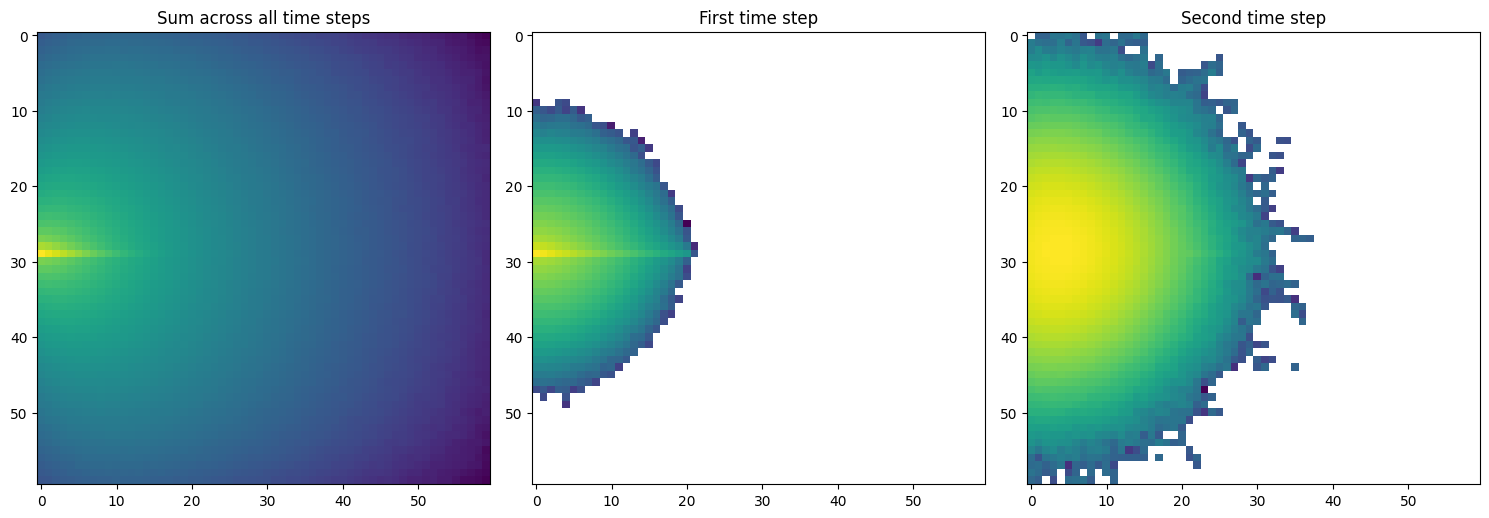

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(np.log10(np.sum(res['flux'], axis=3)[29,:, :]))
axs[0].set_title('Sum across all time steps')

axs[1].imshow(np.log10(res['flux'][29,:, :, 0]))
axs[1].set_title('First time step')

axs[2].imshow(np.log10(res['flux'][29,:, :, 1]))
axs[2].set_title('Second time step')

plt.tight_layout()
plt.show()


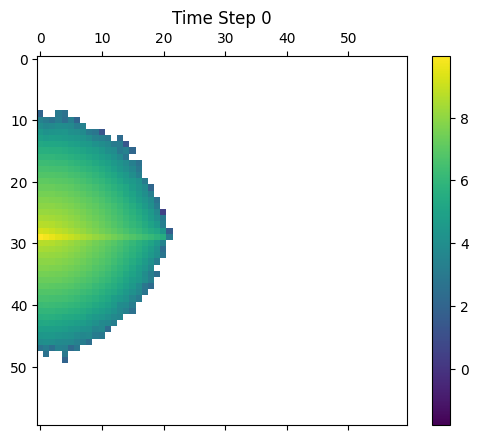

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

data = res['flux'][29, :, :, :]

# Calculate the overall min and max values for the color range
with np.errstate(divide="ignore"):
    log_data = np.log10(data)
vmin = np.min(log_data[np.isfinite(log_data)])
vmax = np.max(log_data[np.isfinite(log_data)])

# Set up the figure and axis
fig, ax = plt.subplots()
cax = ax.matshow(log_data[:, :, 0], cmap='viridis', vmin=vmin, vmax=vmax)
fig.colorbar(cax)

def update(frame):
    ax.clear()
    cax = ax.matshow(log_data[:, :, frame], cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(f'Time Step {frame}')
    return cax,

anim = FuncAnimation(fig, update, frames=range(log_data.shape[2]), blit=False)

# Display the animation in the notebook
HTML(anim.to_jshtml())

In [ ]:
# @title Plot result in 3d
time_step = 2 # @param

plot_3d_slices(np.log10(res['flux'][:, :, :, time_step - 1]))

<ipython-input-11-31fb90cc9836>:4: RuntimeWarning: divide by zero encountered in log10
  plot_3d_slices(np.log10(res['flux'][:, :, :, time_step - 1]))


## Plot TPSF



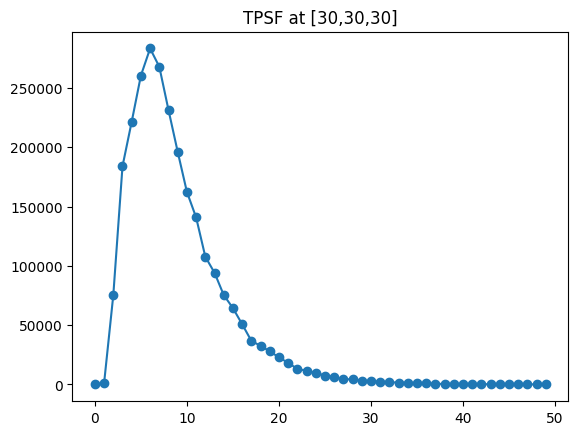

In [ ]:
#@markdown Plot the TPSF of a point at following location (range 0~59):
x = 30 # @param {type:"integer"}
y = 30 # @param {type:"integer"}
z = 30 # @param {type:"integer"}
plt.plot(res['flux'][x,y,z,:], '-o')
plt.title(f"TPSF at [{x},{y},{z}]")
plt.show()

# Exec 2 - Partial pathlength calculation

This example will demonstrate how to calculate partial pathlength in a heterogenous medium with multiple optical properties. Calculating the partial pathlength in each medium allows us to determine the distance that photons travel within specific regions before they are detected. This help us understand how photons interact with different sections of the medium.


In this section, we will cover:
* <b>Use `pmcx` to do multi-medium photon simulation </b>
* <b>Calculate mean partial pathlength in each media: </b></br>
  Understand how to compute the average distance photons travel within each region of the heterogenous medium.
* <b>Plot the histogram of the partial pathlengths: </b></br>
  Visualize the distribution of partial path lengths for each medium to analyze the variability of photon interactions in different regions

In [ ]:
nphoton = 1e7
vol = [60,60,60]
tstart = 0
tend = 5e-9
tstep = 5e-9
srcpos = [30,30,0]
srcdir = [0,0,1]
prop = [[0,0,1,1], [0.005, 1, 0, 1.37], [0.2, 10, 0.9, 1.37], [0.08, 40, 0.9, 1.37]]
detpos = [[30, 20, 1, 1], [30, 40, 1, 1], [20, 30, 1, 1], [40, 30, 1, 1]]

# @markdown Add inclusion - medium 1 (layer)
layer_axis = 'z' # @param ['x', 'y', 'z']
layer_index = 5 # @param {type:"integer"}

# @markdown Add inclusion - medium 2 (box)
box_center_x = 30 # @param {type:"integer"}
box_center_y = 30 # @param {type:"integer"}
box_center_z = 20 # @param {type:"integer"}
box_length_x = 20 # @param {type:"integer"}
box_length_y = 20 # @param {type:"integer"}
box_length_z = 20 # @param {type:"integer"}

cfg = {
       'nphoton': nphoton,
       'vol':np.ones(vol,dtype='uint8'),
       'tstart':tstart,
       'tend':tend,
       'tstep':tend,
       'srcpos': srcpos,
       'srcdir': srcdir,
       'prop':prop,
       'detpos': detpos
       }
if layer_axis == 'x':
    cfg['vol'][layer_index, :, :] = 3
if layer_axis == 'y':
    cfg['vol'][:, layer_index, :] = 3
if layer_axis == 'z':
    cfg['vol'][:, :, layer_index] = 3
cfg['vol'][box_center_x-int(box_length_x/2):box_center_x+int(box_length_x/2), box_center_y-int(box_length_y/2):box_center_y+int(box_length_y/2), box_center_z-int(box_length_z/2):box_center_z+int(box_length_z/2)] = 2

In [ ]:
# Run simulation
res = pmcx.mcxlab(cfg)

nphoton: 1e+07
tstart: 0
tstep: 5e-09
tend: 5e-09


In [ ]:
plot_3d_slices(np.log10(res['flux']))

## Calculate mean partial pathlength in each medium

The mean partial path length (MPPL) for the $j$-th region is calculated using the following formula:

$\text{MPPL}_j = \frac{\sum_{i=1}^{N} w_i \cdot L_{i,j}}{\sum_{i=1}^{N} w_i}$

where:
* $N$ is the total number of photon detected
* $w_i$ is the weight associated with the $i$-th photon (can obtain from `pmcx.detweight` function)
* $L_{i,j}$ is the patial path length of the $i$-th photon within the $j$-th region (`res['detp']['ppath']`)

In [ ]:
mppl = np.sum(res['detp']['ppath'] * pmcx.detweight(res['detp'])[:, None], axis=0) / np.sum(pmcx.detweight(res['detp']))
print("Mean partial pathlength in medium 1:, ", mppl[0])
print("Mean partial pathlength in medium 2:, ", mppl[1])

Mean partial pathlength in medium 1:,  50.543599918984256
Mean partial pathlength in medium 2:,  0.022812059986249123


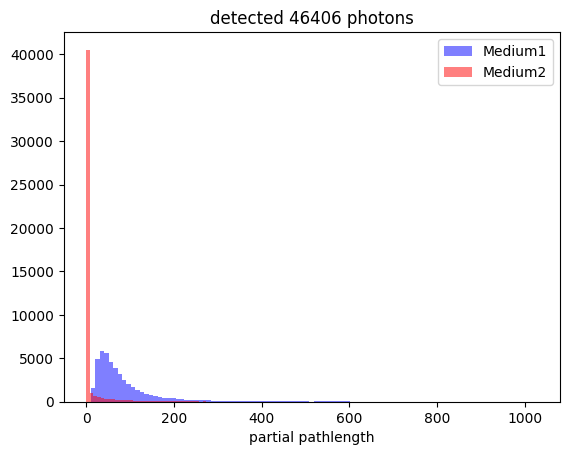

In [ ]:
n_photons = res['detp']['ppath'].shape[0]

plt.hist(res['detp']['ppath'][:,0], bins=100, alpha=0.5, color = 'blue', label='Medium1')
plt.hist(res['detp']['ppath'][:,1], bins=100, alpha=0.5, color = 'red', label='Medium2')
plt.xlabel("partial pathlength")
plt.title(f"detected {n_photons} photons")
plt.legend()
plt.show()

# Exec 3 - Replay in photon simulation
In this example, we will show the replay in photon simulations. Replay involves storing photon paths and previously recorded seeds. By saving the seeds, replay can create Jacobians matrix for absorption and scattering coefficients, which is crucial for applications like diffuse optical tomography (DOT).

We will cover the following topics:
* <b>Use replay to generate jaobian matrix: </b></br>
  Learn how to use replay in photon simulation to generate a Jacobian matrix.

* <b>File exchange between Octave/MATLAB and Python: </b></br>
  Understand the process of exchanging data files between Octave/MATLAB and Python. This allows users to perform simulation in the Octave/MATLAB environment and then visualize or analyze the results in the Python environment, using Python's libraries for machine learning and data analysis.

In [ ]:
# @title Initial simulation
%%octave
clear cfg

cfg.nphoton=1e7;
cfg.vol=uint8(ones(60,60,60));
% cfg.vol(20:40,20:40,10:30)=2;
cfg.tstart=0;
cfg.tend=5e-9;
cfg.tstep=5e-9;
cfg.srcpos=[30 30 1];
cfg.srcdir=[0 0 1];
cfg.prop=[0 0 1 1;
          0.005 1 0.01 1.37;
          0.1, 10, 0.9, 1];
cfg.detpos=[30,20,0,1];            % to detect photons, one must first define detectors
cfg.issavedet=1;                   % cfg.issavedet must be set to 1 or True in order to save detected photons
cfg.issrcfrom0=1;                  % set this flag to ensure src/det coordinates align with voxel space
cfg.issaveseed=1;     %%!important!% set this flag to store detected photon seed data

[fluence,detphoton,vol,seeds,trajectory]=mcxlab(cfg);

Launching MCXLAB - Monte Carlo eXtreme for MATLAB & GNU Octave ...

Running simulations for configuration #1 ...

mcx.nphoton=1e+07;

mcx.dim=[60 60 60];

mcx.mediabyte=1;

mcx.tstart=0;

mcx.tend=5e-09;

mcx.tstep=5e-09;

mcx.srcpos=[30 30 1 1];

mcx.srcdir=[0 0 1 0];

mcx.medianum=3;

mcx.detnum=1;

mcx.issavedet=1;

mcx.issrcfrom0=1;

mcx.issaveseed=1;

###############################################################################

#                      Monte Carlo eXtreme (MCX) -- CUDA                      #

#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #

#                https://mcx.space/  &  https://neurojson.io/                 #

#                                                                             #

# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #

#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #

###############################################################################

#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #

###############################################################################

#  Open-source codes and reusable scientific data are essential for research, #

# MCX proudly developed human-readable JSON-based data formats for easy reuse.#

#                                                                             #

#Please visit our free scientific data sharing portal at https://neurojson.io/#

# and consider sharing your public datasets in standardized JSON/JData format #

###############################################################################

$Rev::f959c7$v2024.6 $Date::2024-06-22 15:23:34 -04$ by $Author::Qianqian Fang$

###############################################################################

- code name: [Jumbo Jolt] compiled by nvcc [9.0] for CUDA-arch [350] on [Jun 25 2024]

- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (Tesla T4) threadph=122 extra=5760 np=10000000 nthread=81920 maxgate=1 repetition=1

initializing streams ...	init complete : 20 ms

requesting 2816 bytes of shared memory

launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...

simulation run# 1 ...

kernel complete:  	881 ms

retrieving fields ... 	WARNING: the saved trajectory positions (1710608034) are more than what your have specified (10000000), please use the --maxjumpdebug option to specify a greater number

detected 13755 photons, total: 13755	transfer complete:	1101 ms

normalizing raw data ...	source 1, normalization factor alpha=20.000000

data normalization complete : 1108 ms

simulated 10000000 photons (10000000) with 81920 threads (repeat x1)

MCX simulation speed: 12500.00 photon/ms

total simulated energy: 10000000.00	absorbed: 34.57201%

(loss due to initial specular reflection is excluded in the total)

In [ ]:
# @title Replay
%%octave
cfg_replay = cfg;
cfg_replay.seed = seeds.data;
cfg_replay.detphotons = detphoton;
cfg_replay.outputtype = 'jacobian';

[fluence2,detphoton2,vol2,seed2,trajectory2] = mcxlab(cfg_replay);

Launching MCXLAB - Monte Carlo eXtreme for MATLAB & GNU Octave ...

Running simulations for configuration #1 ...

mcx.nphoton=1e+07;

mcx.dim=[60 60 60];

mcx.mediabyte=1;

mcx.tstart=0;

mcx.tend=5e-09;

mcx.tstep=5e-09;

mcx.srcpos=[30 30 1 1];

mcx.srcdir=[0 0 1 0];

mcx.medianum=3;

mcx.detnum=1;

mcx.issavedet=1;

mcx.issrcfrom0=1;

mcx.issaveseed=1;

mcx.nphoton=13755;

mcx.detphotons=[3 13755];

mcx.outputtype='jacobian';

###############################################################################

#                      Monte Carlo eXtreme (MCX) -- CUDA                      #

#          Copyright (c) 2009-2024 Qianqian Fang <q.fang at neu.edu>          #

#                https://mcx.space/  &  https://neurojson.io/                 #

#                                                                             #

# Computational Optics & Translational Imaging (COTI) Lab- http://fanglab.org #

#   Department of Bioengineering, Northeastern University, Boston, MA, USA    #

###############################################################################

#    The MCX Project is funded by the NIH/NIGMS under grant R01-GM114365      #

###############################################################################

#  Open-source codes and reusable scientific data are essential for research, #

# MCX proudly developed human-readable JSON-based data formats for easy reuse.#

#                                                                             #

#Please visit our free scientific data sharing portal at https://neurojson.io/#

# and consider sharing your public datasets in standardized JSON/JData format #

###############################################################################

$Rev::f959c7$v2024.6 $Date::2024-06-22 15:23:34 -04$ by $Author::Qianqian Fang$

###############################################################################

- code name: [Jumbo Jolt] compiled by nvcc [9.0] for CUDA-arch [350] on [Jun 25 2024]

- compiled with: RNG [xorshift128+] with Seed Length [4]

GPU=1 (Tesla T4) threadph=0 extra=13755 np=13755 nthread=81920 maxgate=1 repetition=1

initializing streams ...	init complete : 0 ms

requesting 2816 bytes of shared memory

launching MCX simulation for time window [0.00e+00ns 5.00e+00ns] ...

simulation run# 1 ...

kernel complete:  	14 ms

retrieving fields ... 	saved 1742134 trajectory positions, total: 1742134	detected 13755 photons, total: 13755	transfer complete:	67 ms

normalizing raw data ...	normalization factor for detector 0 alpha=0.000117

source 1, normalization factor alpha=0.000117

data normalization complete : 75 ms

simulated 13755 photons (13755) with 81920 threads (repeat x1)

MCX simulation speed: 1146.25 photon/ms

total simulated energy: 13755.00	absorbed: 37.62285%

(loss due to initial specular reflection is excluded in the total)

In [ ]:
%%octave
% save to text-based JSON file and list file size
tic;savejd('', fluence2, 'filename', 'mcx_replay_jacobian.json', 'compression', 'zlib');toc
system('ls -l mcx_replay_jacobian.json');

Elapsed time is 0.0898738 seconds.

-rw-r--r-- 1 root root 327446 Jun 25 21:16 mcx_replay_jacobian.json

## Load simulation result in python

In [ ]:
import jdata as jd
flux=jd.load('mcx_replay_jacobian.json')

<ipython-input-34-10f78300c893>:1: RuntimeWarning:

divide by zero encountered in log10



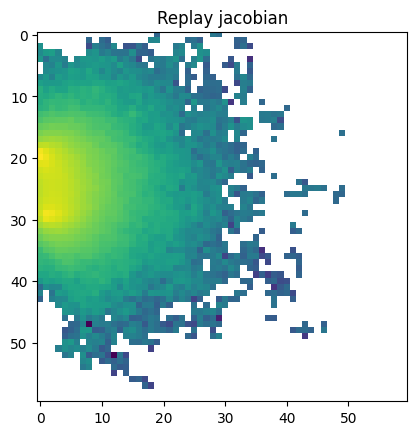

In [ ]:
plt.imshow(np.log10(flux['data'][29,:,:])) # Not 30, cause Python index start from 0
plt.title("Replay jacobian")
plt.show()

In [ ]:
plot_3d_slices(np.log10(flux['data']))

<ipython-input-22-20b60ac1f126>:1: RuntimeWarning:

divide by zero encountered in log10



---

Note: `pmcx` is still being developed. If you're missing any features from MATLAB that aren't in Python yet, or if you find any bugs while using `pmcx` toolbox, please let us know!